프로젝트 주제 : 은행 고객 이탈 예측 모델 생성 및 마케팅 솔루션 제안

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

plt.rc('font', family='NanumGothic') # For Windows
%matplotlib inline

In [3]:
#데이터 로드 
import warnings
warnings.filterwarnings('ignore')

# 모든 컬럼 출력설정(선택)
pd.set_option('display.max_columns', None)

# 데이터 로드 &인덱스 제외
data = pd.read_csv('Churn_Modelling.csv')
data.head(3)

#data :  원본 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1


# 중복값/결측치 처리

In [4]:
#중복값 제거
df = data.drop_duplicates()
print(f'중복값 제거 후 : {df.shape}')

#결측치 제거 
df.dropna(axis=0, how='any', inplace = True)
print(f'결측치 제거 후 : {df.shape}')

#순번 제거
del df['RowNumber']

#출력
display(df.head(3))

중복값 제거 후 : (10000, 14)
결측치 제거 후 : (9996, 14)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1


# 컬럼별 이탈 현황 시각화 


# 범주형 분포 확인 


Exited,0,1
Geography,,
France,83.8,16.2
Germany,67.6,32.4
Spain,83.3,16.7


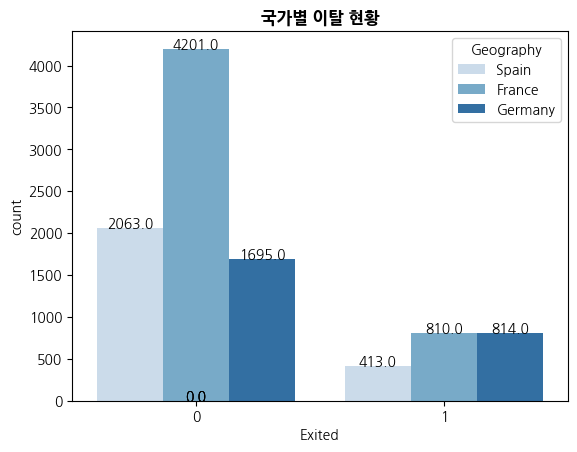

In [5]:
#범주형 변수 이탈 분포 시각화 
x = 'Geography'
y = 'Exited'
display(pd.crosstab(index = df[x],columns= df[y],normalize='index').mul(100).round(1))

ax = sns.countplot(data=df,x=y,hue=x,palette='Blues')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('국가별 이탈 현황',fontweight='bold')
plt.show()

Exited,0,1
Gender,,
Female,74.9,25.1
Male,83.5,16.5


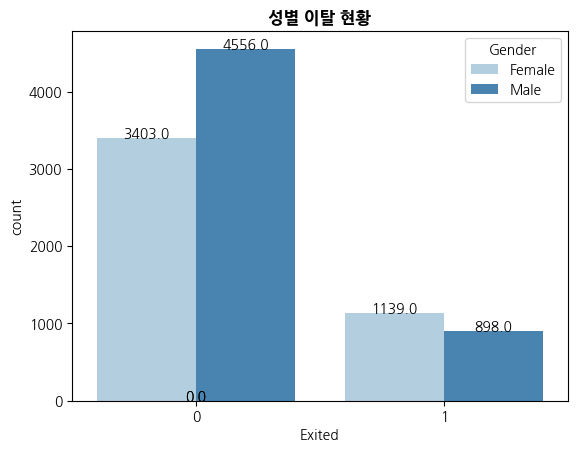

In [6]:
#범주형 변수 이탈 분포 시각화 
x = 'Gender'
y = 'Exited'
display(pd.crosstab(index = df[x],columns= df[y],normalize='index').mul(100).round(1))

ax = sns.countplot(data=df,x=y,hue=x,palette='Blues')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('성별 이탈 현황',fontweight='bold')
plt.show()

Exited,0,1
NumOfProducts,,
1,72.3,27.7
2,92.4,7.6
3,17.3,82.7
4,0.0,100.0


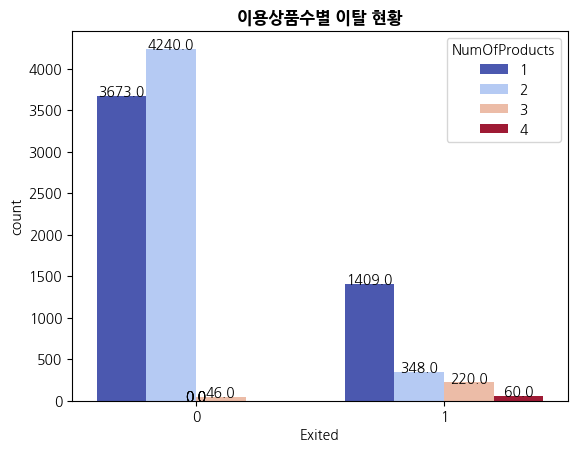

In [7]:
#범주형 변수 이탈 분포 시각화 
x = 'NumOfProducts'
y = 'Exited'
display(pd.crosstab(index = df[x],columns= df[y],normalize='index').mul(100).round(1))

ax = sns.countplot(data=df,x=y,hue=x,palette='coolwarm')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('이용상품수별 이탈 현황',fontweight='bold')
plt.show()

In [8]:
# 이용 상품 갯수별 이탈 숫자로 확인 : 이용갯수가 4개인 60명 모두 이탈함 
con_n = df['NumOfProducts']== 4

df.loc[con_n,'Exited'].value_counts()

Exited
1    60
Name: count, dtype: int64

Exited,0,1
HasCrCard,,
0.0,79.2,20.8
1.0,79.8,20.2


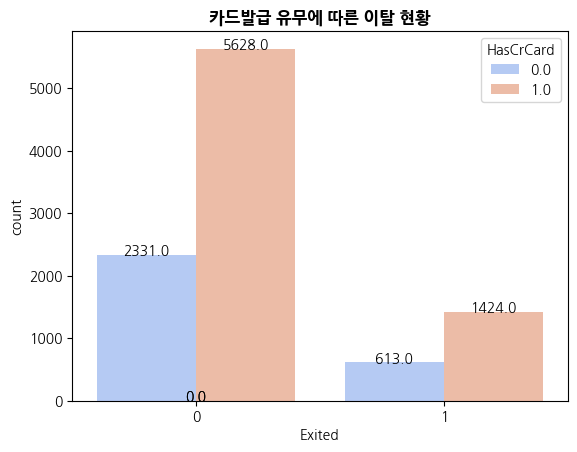

In [9]:
#범주형 변수 이탈 분포 시각화 
x = 'HasCrCard'
y = 'Exited'
display(pd.crosstab(index = df[x],columns= df[y],normalize='index').mul(100).round(1))

ax = sns.countplot(data=df,x=y,hue=x,palette='coolwarm')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('카드발급 유무에 따른 이탈 현황',fontweight='bold')
plt.show()

Exited,0,1
IsActiveMember,,
0.0,73.1,26.9
1.0,85.7,14.3


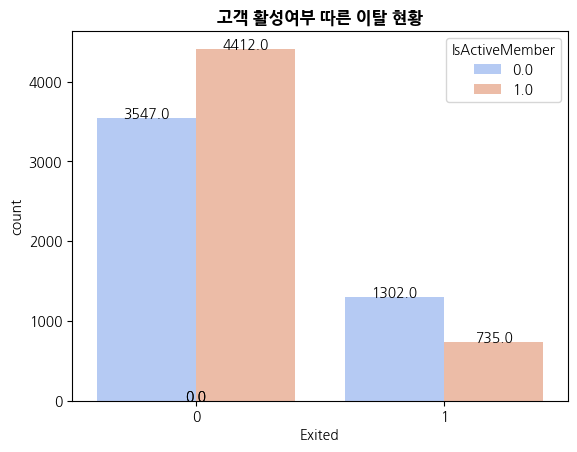

In [10]:
#범주형 변수 이탈 분포 시각화 
x = 'IsActiveMember'
y = 'Exited'
display(pd.crosstab(index = df[x],columns= df[y],normalize='index').mul(100).round(1))

ax = sns.countplot(data=df,x=y,hue=x,palette='coolwarm')

# 그래프 위에 Y값 레이블 추가
for p in ax.patches:
    # 막대의 중심 위치 (x)와 높이 (y)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center')  # y값을 텍스트로 표시

#축 범위 조정
plt.title('고객 활성여부 따른 이탈 현황',fontweight='bold')
plt.show()

# 이산형 분포 확인 

Exited,0,1
Tenure,,
0,77.0,23.0
1,77.6,22.4
2,80.8,19.2
3,78.9,21.1
4,79.5,20.5
5,79.3,20.7
6,79.7,20.3
7,82.8,17.2
8,80.8,19.2


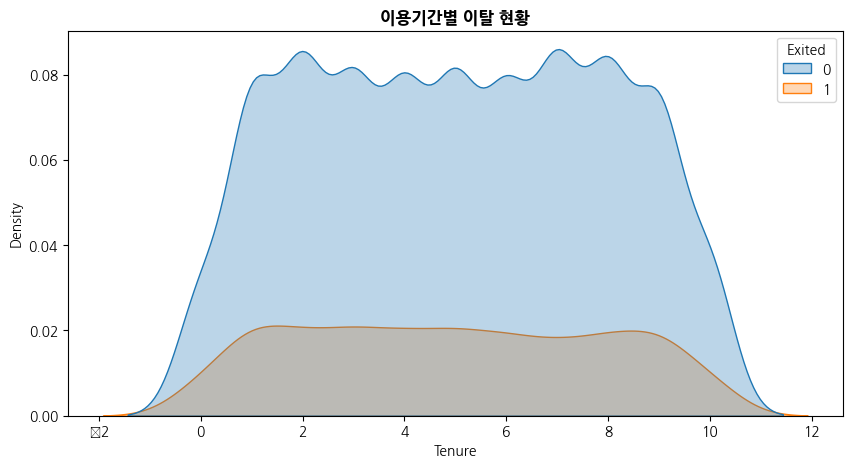

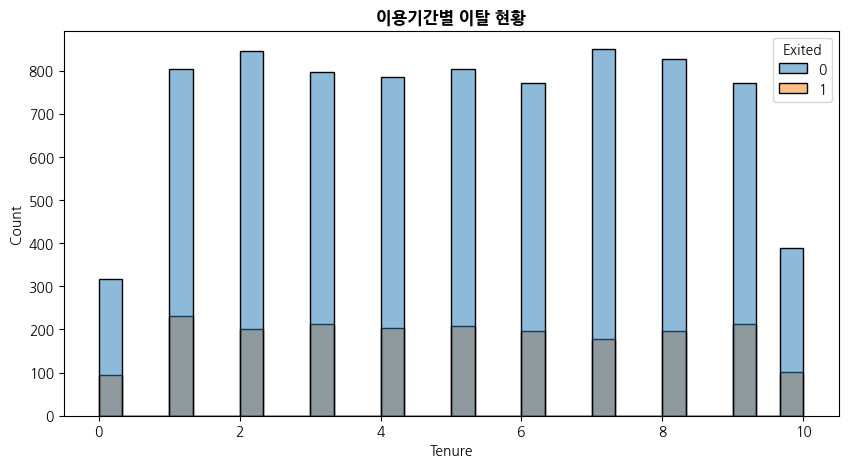

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


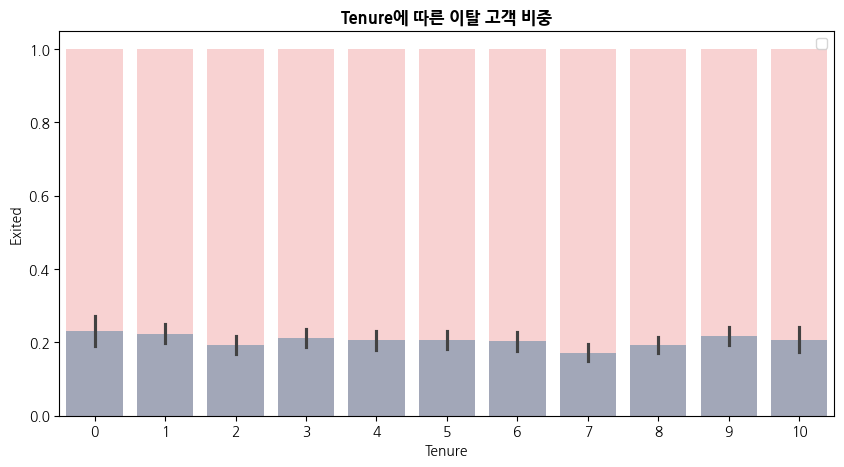

In [18]:
#이산형 이탈 현황 파악 -> 확률 밀도함수로 확인 kdeplot()
x = 'Tenure'
y = 'Exited'

display(pd.crosstab(index = df[x],columns= df[y],normalize='index').mul(100).round(1))

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x=x, hue=y, fill=True, alpha=0.3)  # 부드러운 곡선 & 색 채우기
plt.title('이용기간별 이탈 현황', fontweight='bold')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df,x=x,hue=y,bins=30)
plt.title('이용기간별 이탈 현황',fontweight='bold')
plt.show()

#고객 비중별 이탈 추이
con_ex = df['Exited'] ==1
df_ex = df[con_ex]

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x=x,y=y ,color='skyblue')  #fill=True → 색상 채우기
sns.barplot(data=df_ex, x=x,y=y,color='red',alpha=0.2)  #fill=True → 색상 채우기
# sns.kdeplot(data=df, x=x, fill=True, color='skyblue')  #fill=True → 색상 채우기
# sns.kdeplot(data=df_ex, x=x, fill=True, color='red',alpha=0.2)  #fill=True → 색상 채우기
plt.title(f'{x}에 따른 이탈 고객 비중',fontweight='bold')
plt.legend()
plt.show()


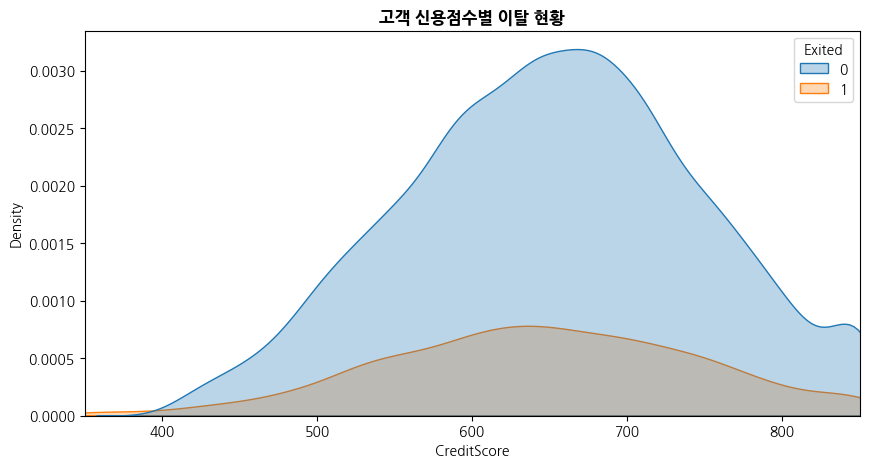

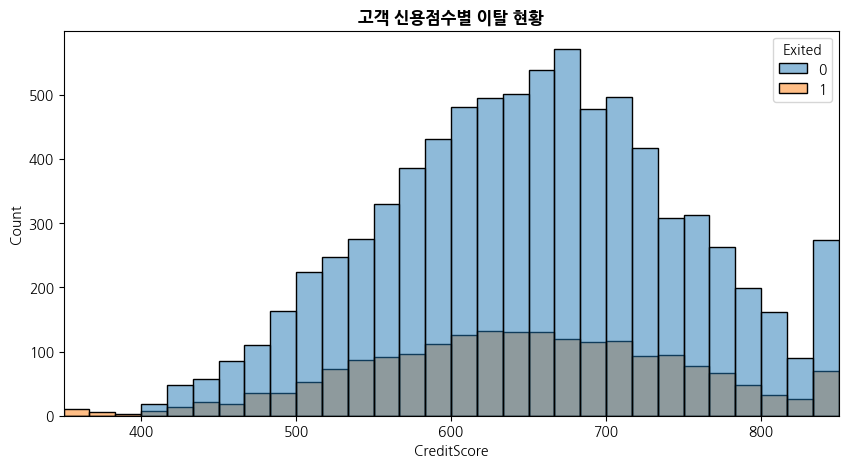

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


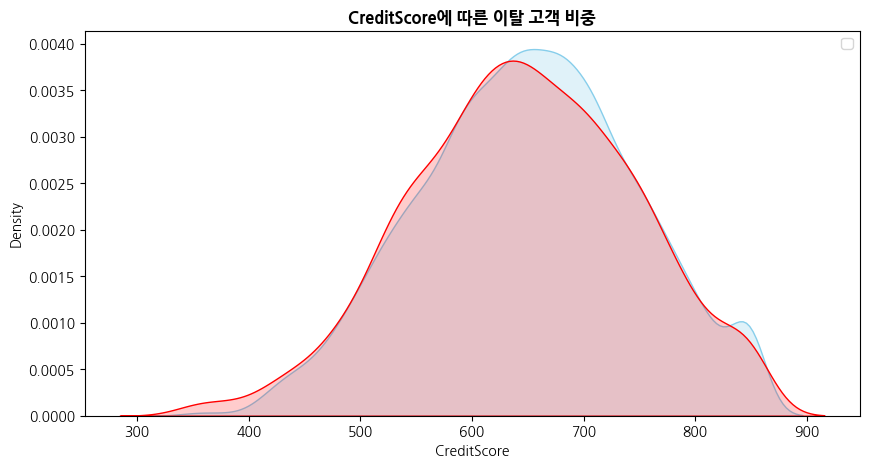

In [12]:
#이산형 이탈 현황 파악 -> 확률 밀도함수로 확인 kdeplot()
x = 'CreditScore'
y = 'Exited'

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x=x, hue=y, fill=True, alpha=0.3)  # 부드러운 곡선 & 색 채우기
plt.title('고객 신용점수별 이탈 현황', fontweight='bold')
plt.xlim(350, 850)
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df,x=x,hue=y,bins=30)
plt.title('고객 신용점수별 이탈 현황',fontweight='bold')
plt.xlim(350, 850)
plt.show()

#고객 비중별 이탈 추이
con_ex = df['Exited'] ==1
df_ex = df[con_ex]

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x=x, fill=True, color='skyblue')  #fill=True → 색상 채우기
sns.kdeplot(data=df_ex, x=x, fill=True, color='red',alpha=0.2)  #fill=True → 색상 채우기
plt.title(f'{x}에 따른 이탈 고객 비중',fontweight='bold')
plt.legend()
plt.show()


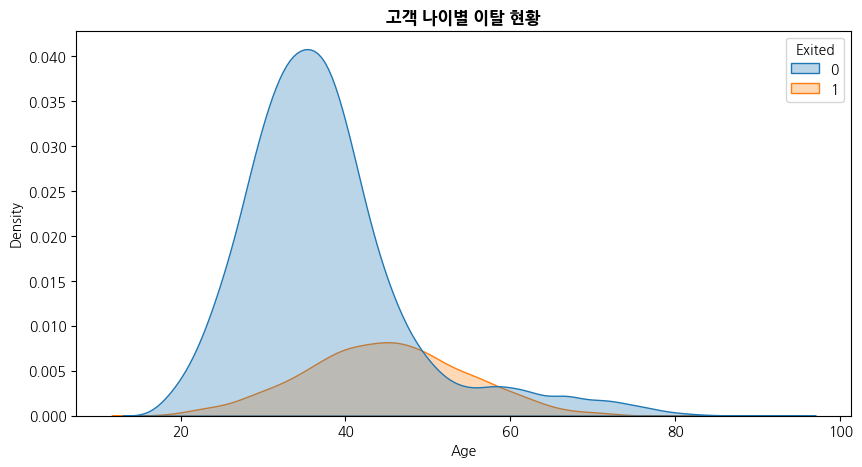

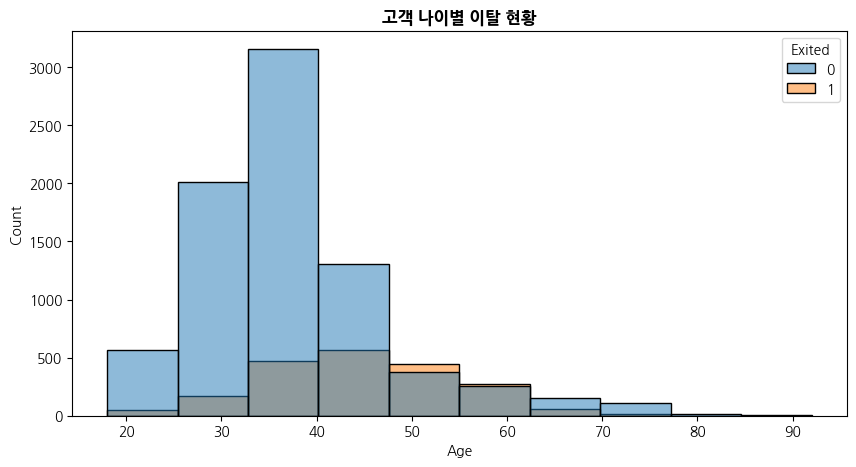

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


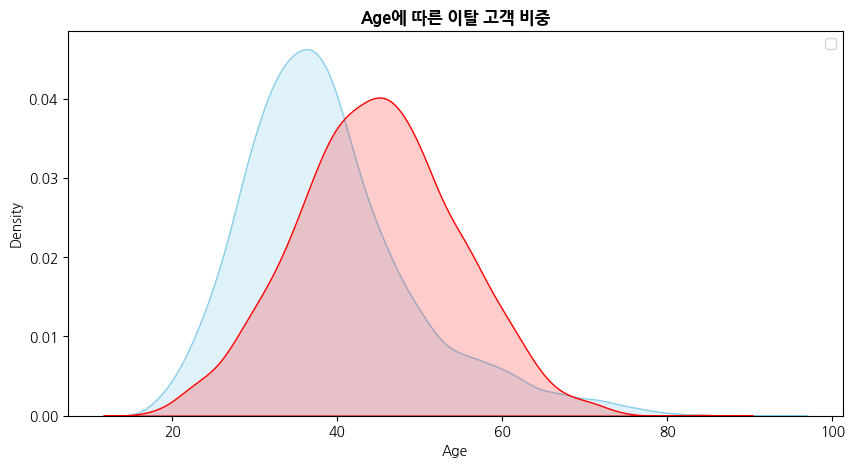

In [13]:
#이산형 이탈 현황 파악 -> 확률 밀도함수로 확인 kdeplot()
x = 'Age'
y = 'Exited'

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x=x, hue=y, fill=True, alpha=0.3)  # 부드러운 곡선 & 색 채우기
plt.title('고객 나이별 이탈 현황', fontweight='bold')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df,x=x,hue=y,bins=10)
plt.title('고객 나이별 이탈 현황',fontweight='bold')
plt.show()


#고객 비중별 이탈 추이
con_ex = df['Exited'] ==1
df_ex = df[con_ex]

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x=x, fill=True, color='skyblue')  #fill=True → 색상 채우기
sns.kdeplot(data=df_ex, x=x, fill=True, color='red',alpha=0.2)  #fill=True → 색상 채우기
plt.title(f'{x}에 따른 이탈 고객 비중',fontweight='bold')
plt.legend()
plt.show()


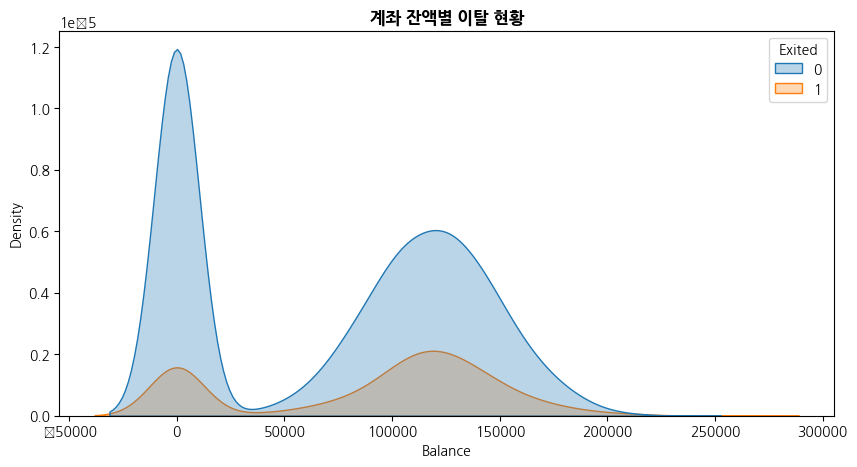

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


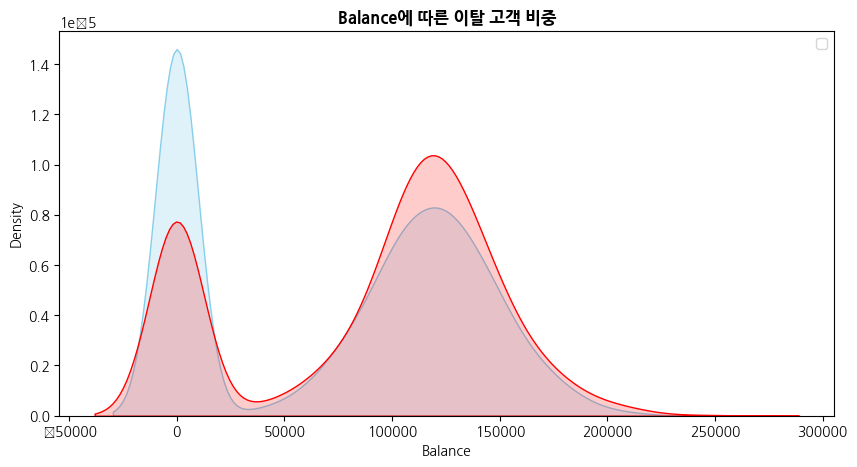

In [14]:
#이산형 이탈 현황 파악 -> 확률 밀도함수로 확인 kdeplot()
x = 'Balance'
y = 'Exited'

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x=x, hue=y, fill=True, alpha=0.3)  # 부드러운 곡선 & 색 채우기
plt.title('계좌 잔액별 이탈 현황', fontweight='bold')
plt.show()

#고객 비중별 이탈 추이
con_ex = df['Exited'] ==1
df_ex = df[con_ex]

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x=x, fill=True, color='skyblue')  #fill=True → 색상 채우기
sns.kdeplot(data=df_ex, x=x, fill=True, color='red',alpha=0.2)  #fill=True → 색상 채우기
plt.title(f'{x}에 따른 이탈 고객 비중',fontweight='bold')
plt.legend()
plt.show()



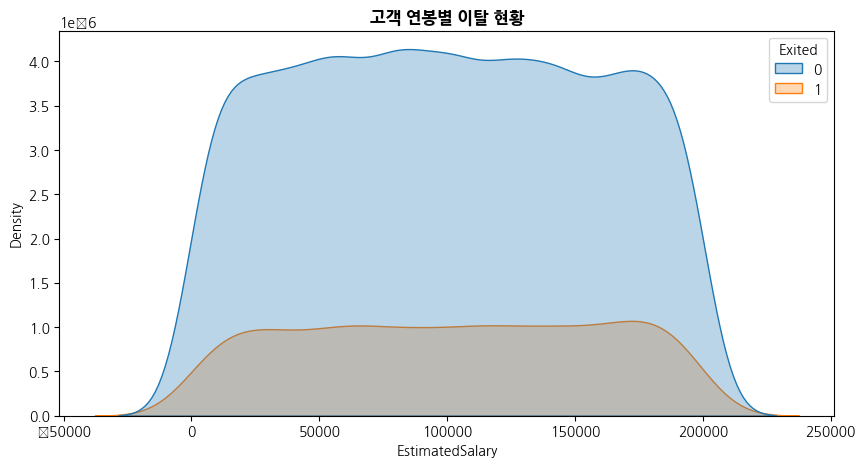

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


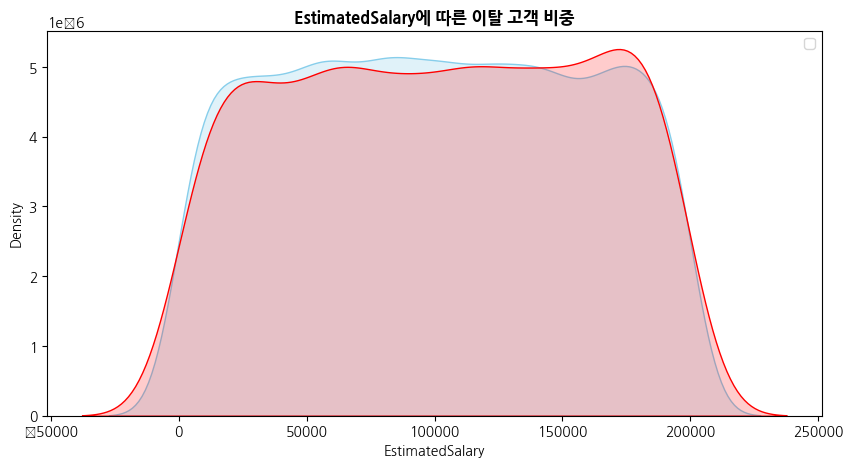

In [15]:

#이산형 이탈 현황 파악 -> 확률 밀도함수로 확인 kdeplot()
x = 'EstimatedSalary'

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x=x, hue=y, fill=True, alpha=0.3)  # 부드러운 곡선 & 색 채우기
plt.title('고객 연봉별 이탈 현황', fontweight='bold')
plt.show()

#고객 비중별 이탈 추이
con_ex = df['Exited'] ==1
df_ex = df[con_ex]

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x=x, fill=True, color='skyblue')  #fill=True → 색상 채우기
sns.kdeplot(data=df_ex, x=x, fill=True, color='red',alpha=0.2)  #fill=True → 색상 채우기
plt.title(f'{x}에 따른 이탈 고객 비중',fontweight='bold')
plt.legend()
plt.show()

## 이탈고객 데이터 써머리

In [16]:
con_ex = df['Exited'] ==1

df[con_ex].describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2.037000e+03,2037,2037.000000,2037,2037,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
unique,NaN,1188,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,Germany,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9,NaN,814,1139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569005e+07,NaN,645.351497,NaN,NaN,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,7.269262e+04,NaN,100.321503,NaN,NaN,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,1.556571e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,1.562736e+07,NaN,578.000000,NaN,NaN,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,1.568896e+07,NaN,646.000000,NaN,NaN,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,1.575309e+07,NaN,716.000000,NaN,NaN,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
